# Plots for end-uses 

In [1]:
import csv 
import matplotlib as matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as md
import dateutil
output_path = "../../output/"

In [2]:
tmy3_file_location = "../../data/CA-San_Jose_Intl_Ap.tmy3"
dry_bulb = []
timestamp = []
with open(tmy3_file_location, newline='', mode='r') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    next(fr)
    for row in fr : 
        if 'Date' not in row[0] :
            timestamp.append(row[0])
            dry_bulb.append(float(row[31]))
peak_day_winter = [timestamp[dry_bulb.index(min(dry_bulb))],min(dry_bulb)]
peak_day_summer = [timestamp[dry_bulb.index(max(dry_bulb))],max(dry_bulb)]
print('Peak winter day', peak_day_winter)
print('Peak summer day', peak_day_summer)

peak_month_day_winter = peak_day_winter[0][0:2] + '-' + peak_day_winter[0][3:5]
peak_month_day_summer = peak_day_summer[0][0:2] + '-' + peak_day_summer[0][3:5]

Peak winter day ['01/24/1999', 0.0]
Peak summer day ['06/15/2004', 35.6]


Assuming that the summer is defined as in PG&E May 1 - Oct 31 and winter is Nov 1 to Apr 30

In [3]:
# panel_dump_path="../paneldump/"
hvac_load_winter = []
hvac_load_summer = [] 
dryer_load_winter = []
dryer_load_summer = []
range_load_winter = [] 
range_load_summer = [] 
wh_load_winter = [] 
wh_load_summer = []

mw_winter = []
lights_winter = []
plugs_winter = []
freezer_winter = []
dw_winter = []
fridge_winter = []
cw_winter = []

mw_summer = []
lights_summer = []
plugs_summer = []
freezer_summer = []
dw_summer = []
fridge_summer = []
cw_summer = []

with open('paneldump_Full_Electric_winterpeak', newline='', mode='r') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    print( "Winter date : ", peak_day_winter[0][0:10] )
    for row in fr :
        if '#' not in row[0] or 'timestamp' not in row[0] : 
            if peak_month_day_winter in row[0] and 'house_1_ELEC_UPGRADE' in row[1] :
                if 'HVAC' in row[2] : 
                    hvac_load_winter.append([row[0], row[3]])
                if 'DRYER' in row[2] :
                    dryer_load_winter.append([row[0], row[3]])
                if 'RANGE' in row[2] : 
                    range_load_winter.append([row[0], row[3]])
                if 'WATERHEATER' in row[2] : 
                    wh_load_winter.append([row[0], row[3]])
                if 'MICROWAVE' in row[2] : 
                    mw_winter.append([row[0], row[3]])
                if 'LIGHTS' in row[2] : 
                    lights_winter.append([row[0], row[3]])
                if 'PLUGS' in row[2] : 
                    plugs_winter.append([row[0], row[3]])
                if 'FREEZER' in row[2] : 
                    freezer_winter.append([row[0], row[3]])
                if 'DISHWASHER' in row[2] : 
                    dw_winter.append([row[0], row[3]])
                if 'REFRIGERATOR' in row[2] : 
                    fridge_winter.append([row[0], row[3]])
                if 'CLOTHESWASHER' in row[2] : 
                    cw_winter.append([row[0], row[3]])
                
                    
with open('paneldump_Full_Electric_summerpeak', newline='', mode='r') as csvfile : 
    fr = csv.reader(csvfile, delimiter=',', quotechar='|')
    print( "Summer date : ", peak_day_summer[0][0:10] )
    for row in fr :
        if '#' not in row[0] or 'timestamp' not in row[0] : 
#             print(peak_month_day_summer)
            if peak_month_day_summer in row[0] and 'house_1_ELEC_UPGRADE' in row[1] :
                if 'HVAC' in row[2] : 
                    hvac_load_summer.append([row[0], row[3]])
                if 'DRYER' in row[2] :
                    dryer_load_summer.append([row[0], row[3]])
                if 'RANGE' in row[2] : 
                    range_load_summer.append([row[0], row[3]])
                if 'WATERHEATER' in row[2] : 
                    wh_load_summer.append([row[0], row[3]])
                if 'MICROWAVE' in row[2] : 
                    mw_summer.append([row[0], row[3]])
                if 'LIGHTS' in row[2] : 
                    lights_summer.append([row[0], row[3]])
                if 'PLUGS' in row[2] : 
                    plugs_summer.append([row[0], row[3]])
                if 'FREEZER' in row[2] : 
                    freezer_summer.append([row[0], row[3]])
                if 'DISHWASHER' in row[2] : 
                    dw_summer.append([row[0], row[3]])
                if 'REFRIGERATOR' in row[2] : 
                    fridge_summer.append([row[0], row[3]])
                if 'CLOTHESWASHER' in row[2] : 
                    cw_summer.append([row[0], row[3]])
            
total_winter = []
total_summer = []
timeseries_total = []
# print("winter")
# print((hvac_load_winter))
# print("summer")
# print((hvac_load_summer))

# print(len(dryer_load_summer))

# print(len(range_load_summer))

# print(len(wh_load_summer))

# print(len(mw_summer))

# print(len(lights_summer))

# print(len(plugs_summer))

# print(len(freezer_summer))

# print(len(dw_summer))

# print(len(fridge_summer))

# print(len(cw_summer))


for i,enduse in enumerate(lights_winter) : 
    timeseries_total.append(lights_winter[i][0])
    total_winter.append(float(hvac_load_winter[i][1])+float(dryer_load_winter[i][1])+float(range_load_winter[i][1])+float(wh_load_winter[i][1])+float(mw_winter[i][1])+float(lights_winter[i][1])+float(plugs_winter[i][1])+float(freezer_winter[i][1])+float(dw_winter[i][1])+float(fridge_winter[i][1])+float(cw_winter[i][1]))
    total_summer.append(float(hvac_load_summer[i][1])+float(dryer_load_summer[i][1])+float(range_load_summer[i][1])+float(wh_load_summer[i][1])+float(mw_summer[i][1])+float(lights_summer[i][1])+float(plugs_summer[i][1])+float(freezer_summer[i][1])+float(dw_summer[i][1])+float(fridge_summer[i][1])+float(cw_summer[i][1]))


Winter date :  01/24/1999
Summer date :  06/15/2004


## End-use plots

### Winter peak end-use loads for a single family home

In [4]:
def enduse_plot(enduse_loadprofile, enduse_type, season) : 
    time_print = []
    time_nozone = []
    value = []
    plt_time = []
    plt_value = []
    time,value = zip(*enduse_loadprofile)
    plt_value = list(map(float, value)) 
    for t in time : 
        time_nozone.append(t[:-4])
    plt_time = [dateutil.parser.parse(s) for s in time_nozone]
    ax=plt.gca()
    ax.set_xticks(plt_time)
    plt.xticks(ax.get_xticks()[::12], rotation=90 )
    xfmt = md.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(xfmt)
    plt.plot(plt_time,[x * 12 for x in plt_value],label=enduse_type)
    tmp_1 = plt.gcf() # get current figure
    plt.tight_layout()
    plt.legend()
    plt.xlabel("Time")
    plt.ylabel("Power [kW]")
    plt.draw()
    tmp_1.set_size_inches(21.5, 10.5)
    tmp_1.savefig("output/"+ enduse_type +"_load_"+season+".png")
    print(season+' maximum '+ enduse_type +' demand : ' + str(max(plt_value)) + ' kW')
    print(season+' minimum '+ enduse_type +' demand : ' + str(min(plt_value))+ ' kW')

winter maximum HVAC demand : 0.275862 kW
winter minimum HVAC demand : 0.0 kW


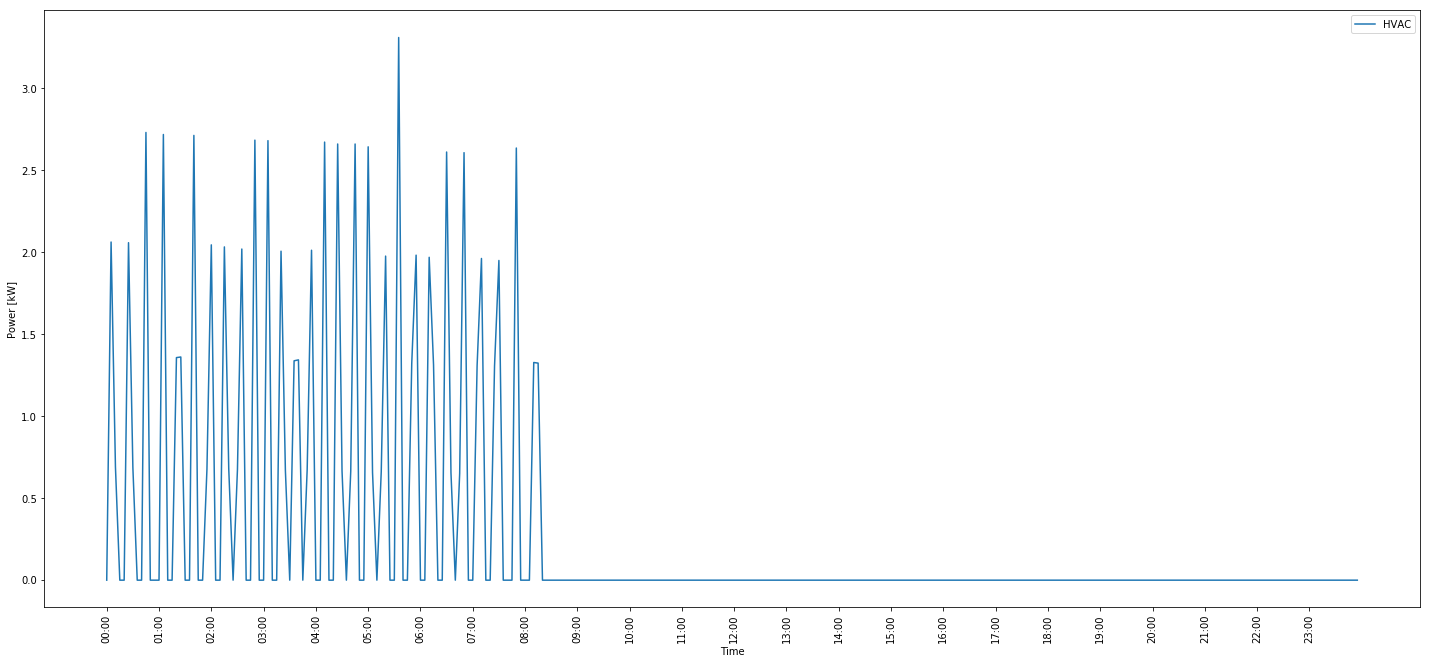

In [5]:
enduse_plot(hvac_load_winter, 'HVAC', 'winter')

winter maximum DRYER demand : 0.00957935 kW
winter minimum DRYER demand : 0.00030393 kW


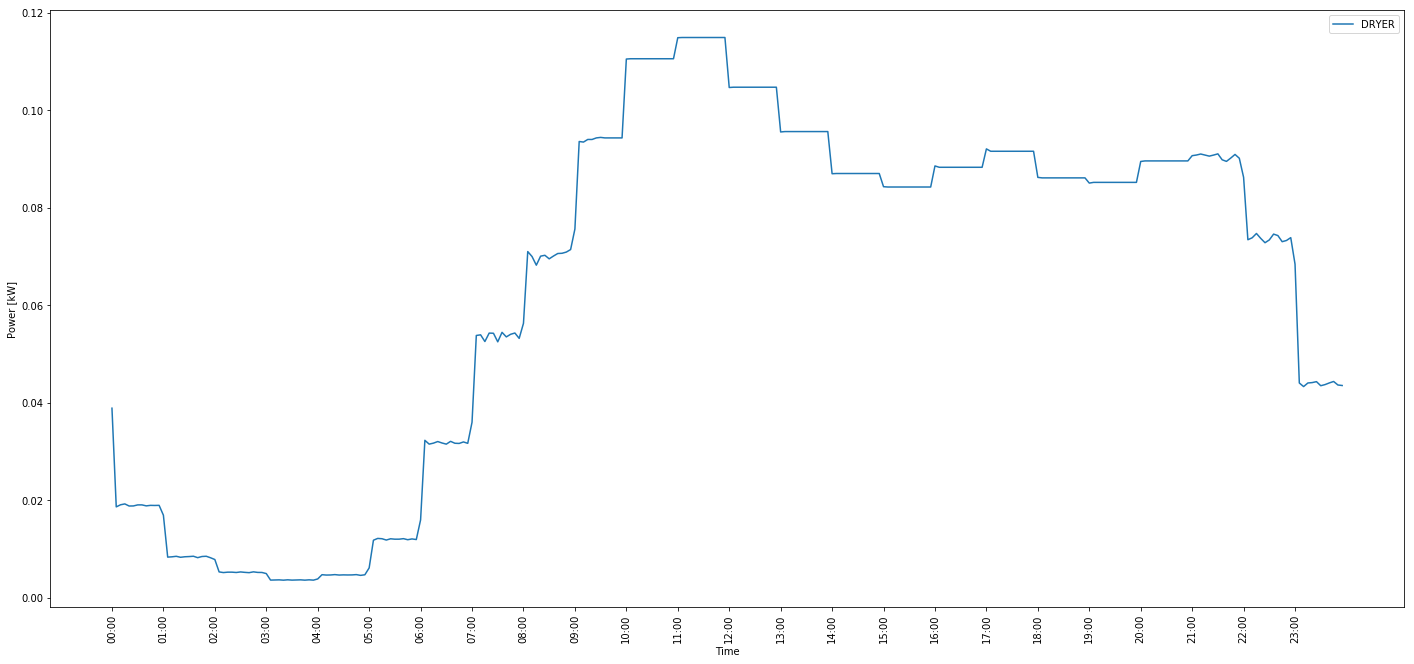

In [6]:
enduse_plot(dryer_load_winter, 'DRYER', 'winter')

winter maximum RANGE demand : 0.0072575 kW
winter minimum RANGE demand : 0.000256489 kW


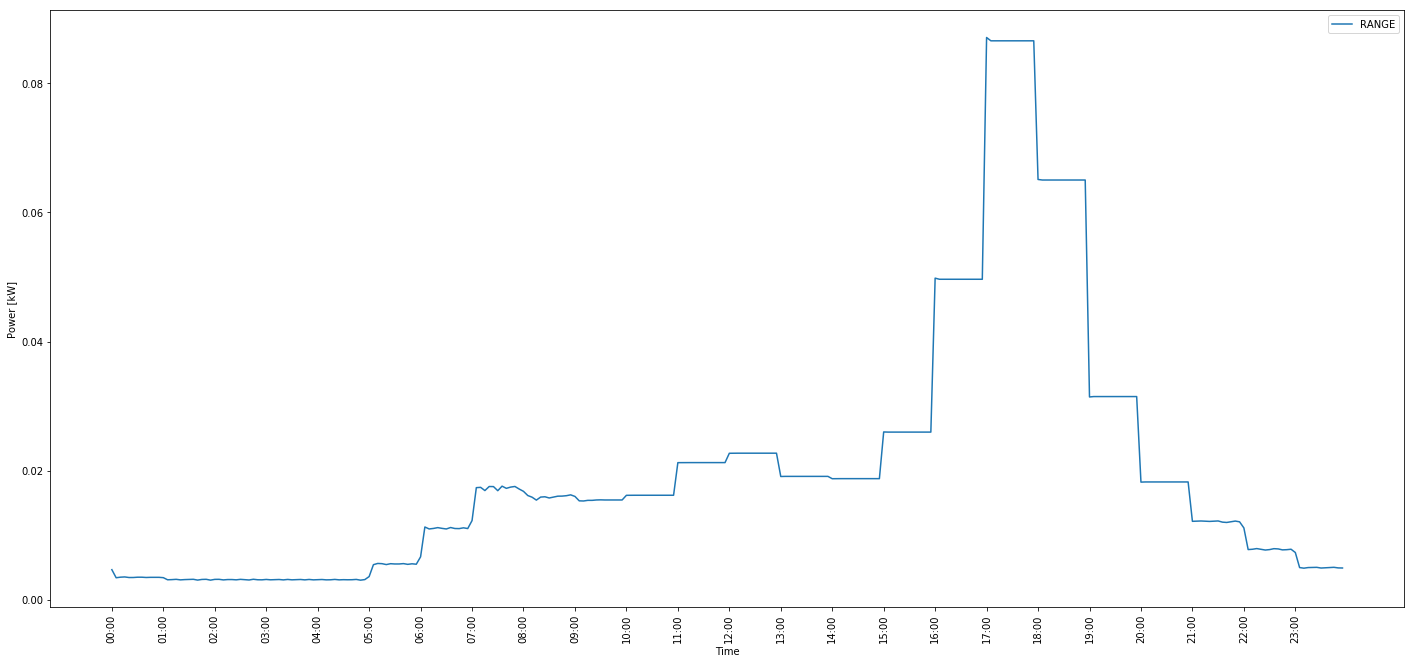

In [7]:
enduse_plot(range_load_winter, 'RANGE', 'winter')

winter maximum WATERHEATER demand : 0.0282486 kW
winter minimum WATERHEATER demand : 0.00353107 kW


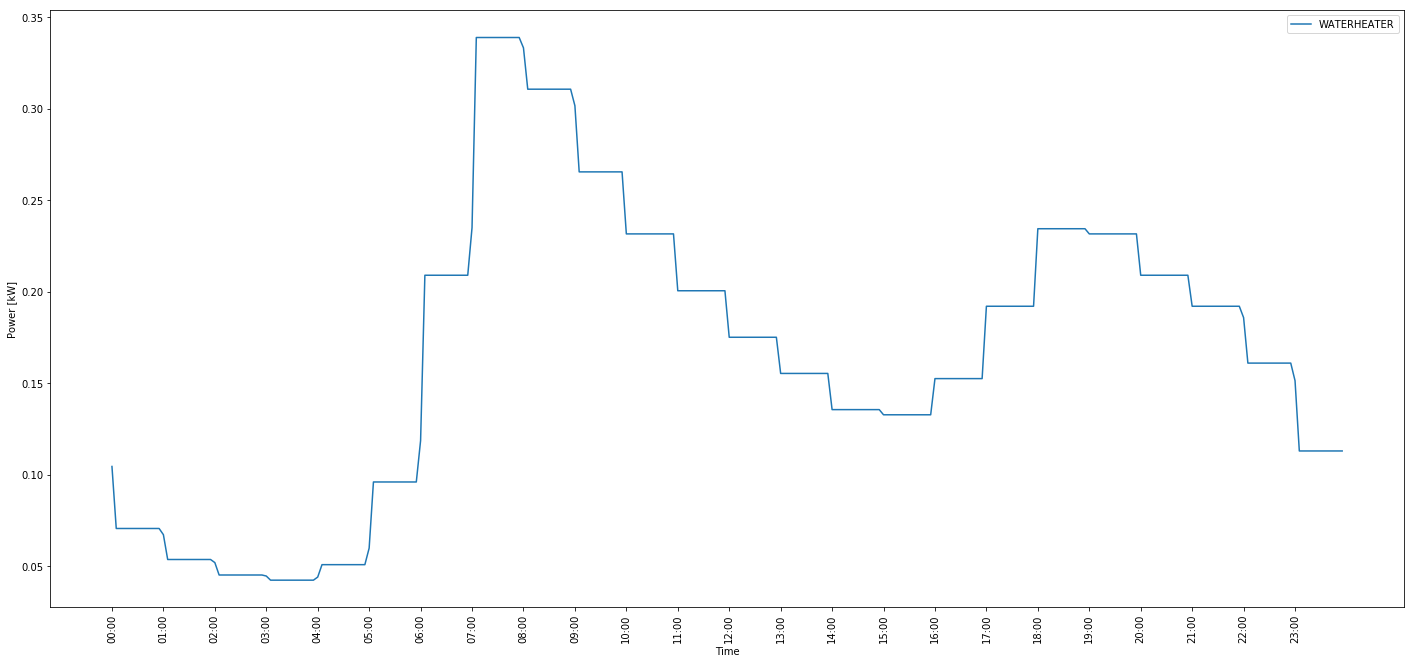

In [8]:
enduse_plot(wh_load_winter, 'WATERHEATER', 'winter')

### Summer peak end-use loads for a single family home 

summer maximum HVAC demand : 0.224201 kW
summer minimum HVAC demand : 0.0 kW


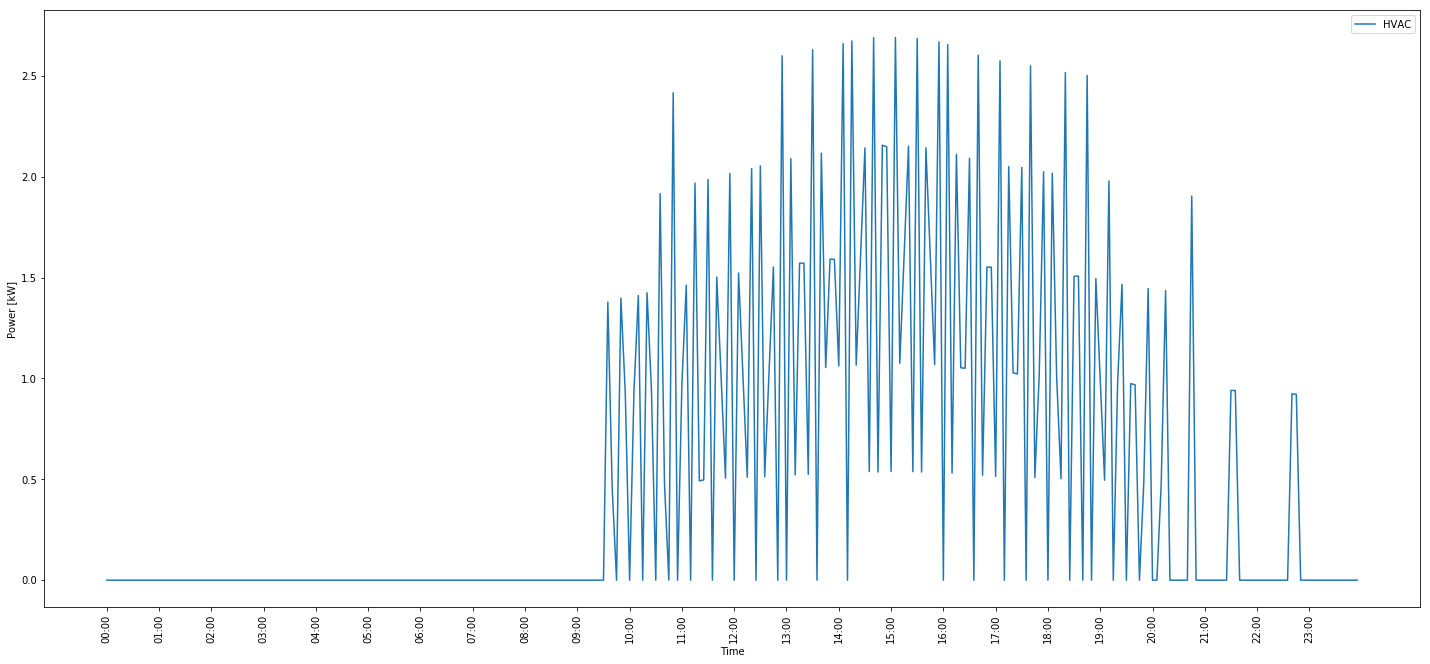

In [9]:
enduse_plot(hvac_load_summer, 'HVAC', 'summer')

summer maximum DRYER demand : 0.00940893 kW
summer minimum DRYER demand : 0.000260866 kW


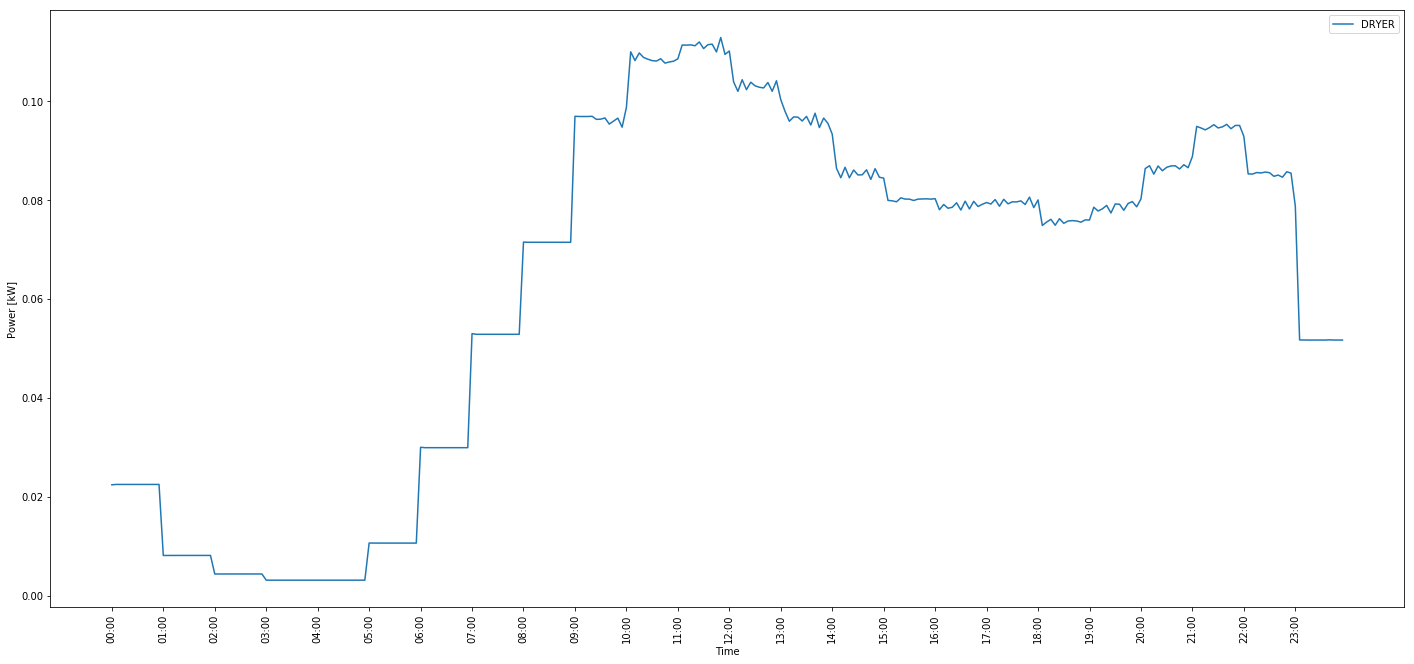

In [10]:
enduse_plot(dryer_load_summer, 'DRYER', 'summer')

summer maximum RANGE demand : 0.00584925 kW
summer minimum RANGE demand : 0.000254623 kW


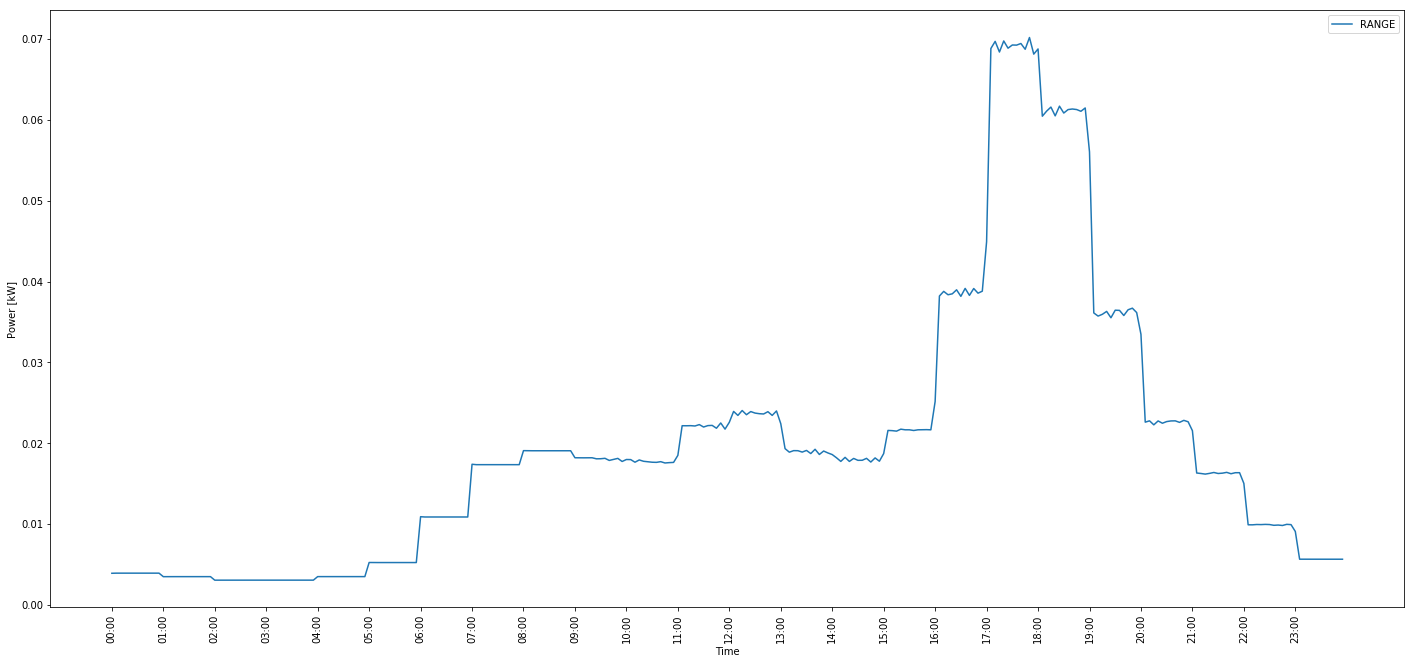

In [11]:
enduse_plot(range_load_summer, 'RANGE', 'summer')

summer maximum WATERHEATER demand : 0.0227541 kW
summer minimum WATERHEATER demand : 0.0035461 kW


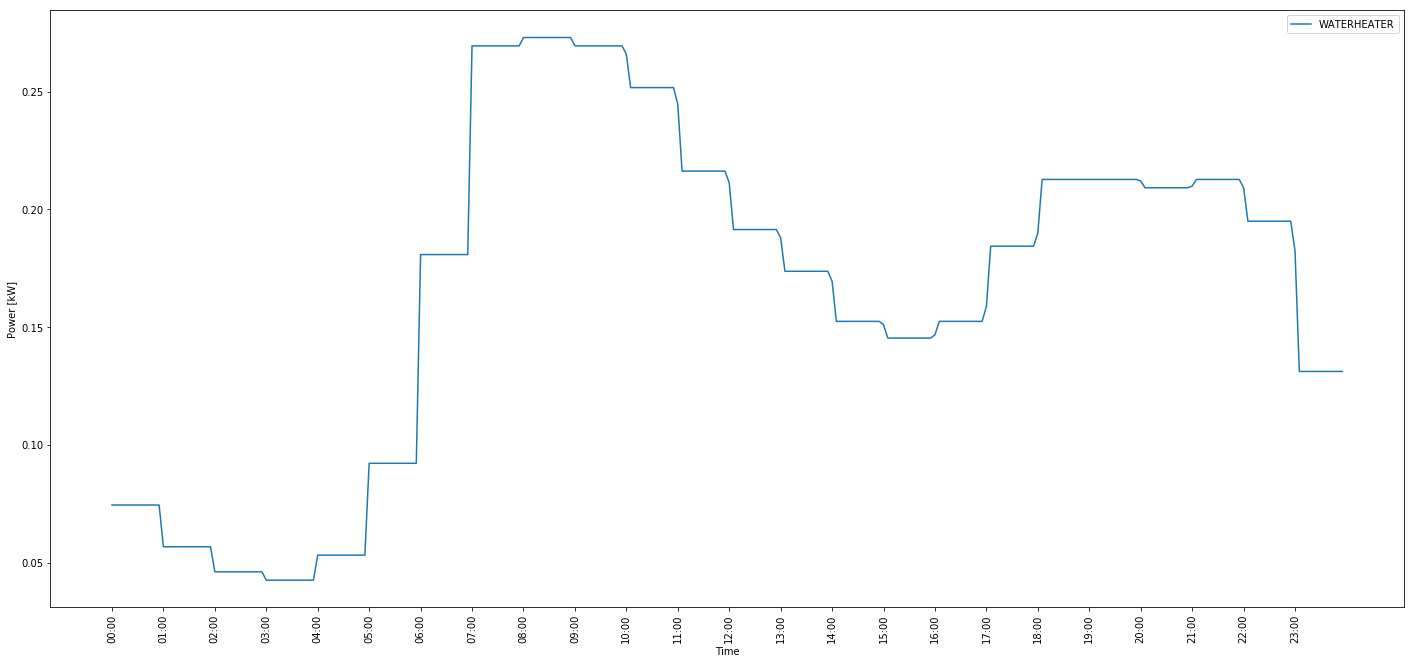

In [12]:
enduse_plot(wh_load_summer, 'WATERHEATER', 'summer')

### Total load 

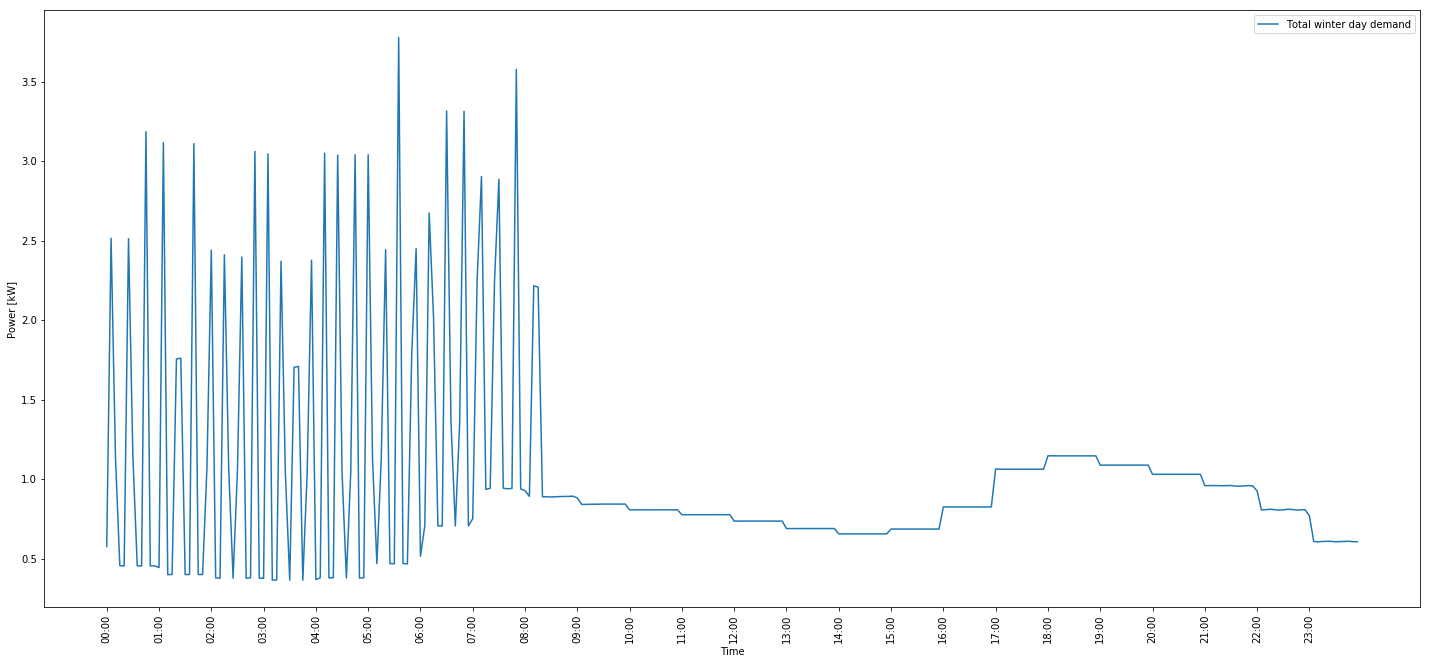

In [13]:
time_nozone = []
for t in timeseries_total : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,[x * 12 for x in total_winter],label='Total winter day demand')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/total_load_winter.png")

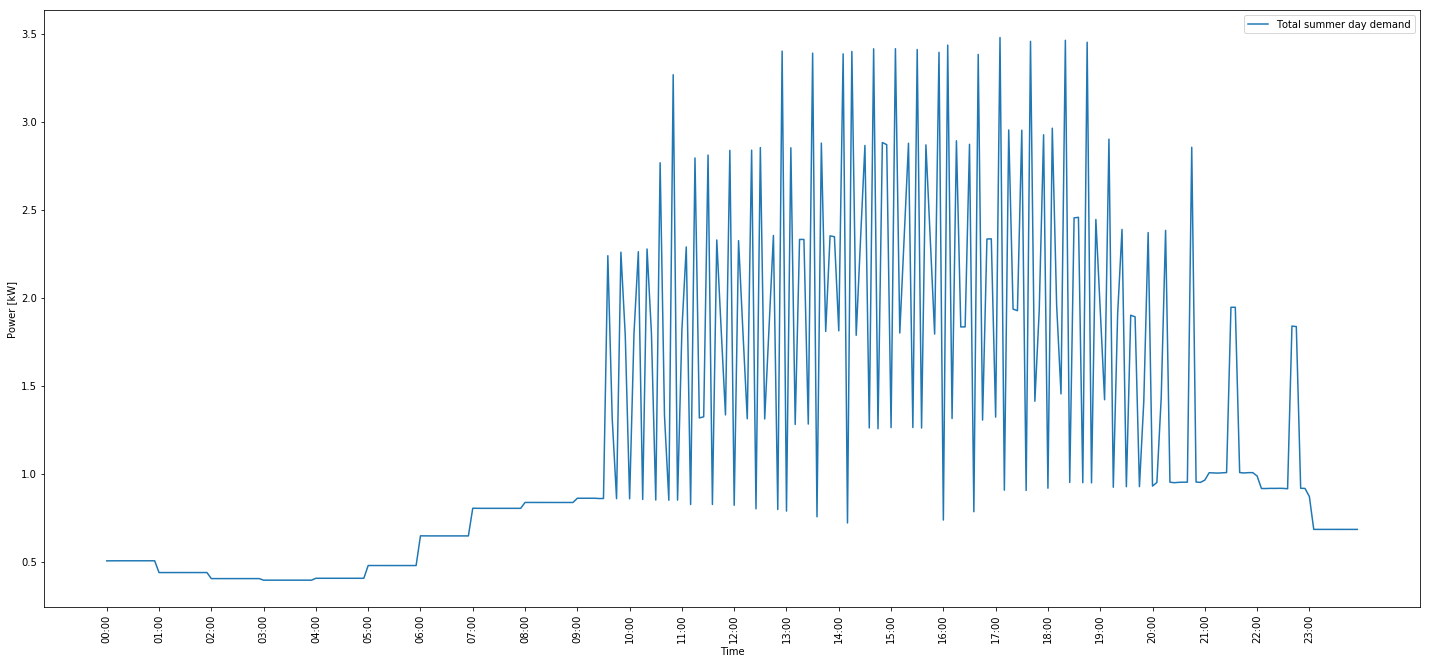

In [14]:
time_nozone = []
for t in timeseries_total : 
    time_nozone.append(t[:-4])
plt_time = [dateutil.parser.parse(s) for s in time_nozone]
ax=plt.gca()
ax.set_xticks(plt_time)
plt.xticks(ax.get_xticks()[::12], rotation=90 )
xfmt = md.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(plt_time,[x * 12 for x in total_summer],label='Total summer day demand')
tmp_1 = plt.gcf() # get current figure
plt.tight_layout()
plt.legend()
plt.xlabel("Time")
plt.ylabel("Power [kW]")
plt.draw()
tmp_1.set_size_inches(21.5, 10.5)
tmp_1.savefig("output/total_load_summer.png")